<a href="https://colab.research.google.com/github/ucheokechukwu/ml_tensorflow_deeplearning/blob/main/10_timeseries_forecasting_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series fundamentals with tensorflow + Milestone project 3: BitPredict 💰📈

Note: This is not financial advice!

Purpose: predict the price of Bitcoin based on historical data

Resources: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/10_time_series_forecasting_in_tensorflow.ipynb

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-03-14 18:34:48--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2023-03-14 18:34:49 (6.05 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time series with pandas


In [2]:
import pandas as pd
# let's read in the Bitcoin data and pass the date

df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date column and tell pandas as Col 1 is Datetime

In [3]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
# how many samples do we have?
len(df)

2787

In [6]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


* Note we've collected the historical price of Bitcoin for the past 8 years but there's only 2,787 samples.
* Usually, deep learning models lik elot samples. A small than ideal number of samples is something you often run into with time series...

* Note: The **seasonality** of a time series dataset is how many samples per year that is collected. For this example, the seasonanility is 365.

In [7]:
# only want closing price for each day

bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})

bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


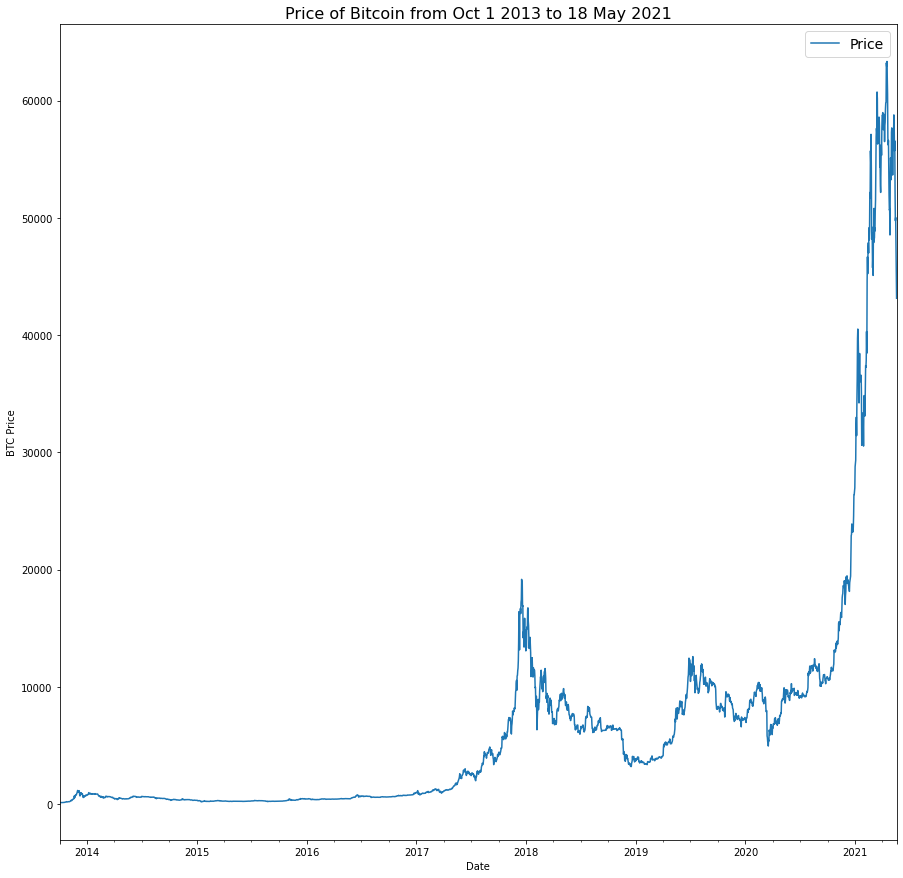

In [8]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(15,15))

plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from Oct 1 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14)

## Importing time series data with Python's CSV module

In [9]:
# importing and formatting historical Bitcoin data with Python

import csv
from datetime import datetime
timesteps = [] # to store our dates
btc_price = []

with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) # skip first line (this gets rid of column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1],"%Y-%m-%d")) #get the dates as dates not strings from line/column 1
    btc_price.append(float(line[2])) # get the prince from line/column 2

In [10]:
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

In [42]:
import matplotlib.pyplot as plt
import numpy as np

In [44]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

Text(0, 0.5, 'BTC Price')

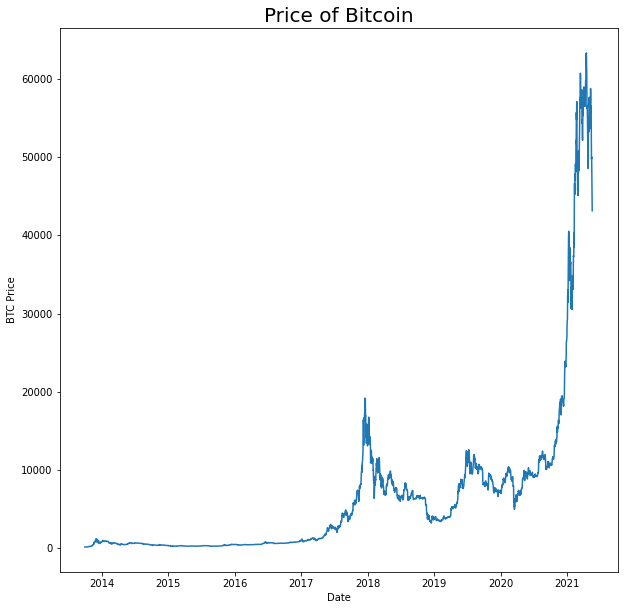

In [45]:
plt.figure(figsize=(10,10))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin", fontsize=20)
plt.xlabel("Date")
plt.ylabel("BTC Price")

## Format Data part 1: create train and test set with time series data

### Creating train and test sets with time series data (the wrong way)

In [12]:
# get bitcon date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

In [13]:
timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [14]:
# wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(timesteps, prices, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

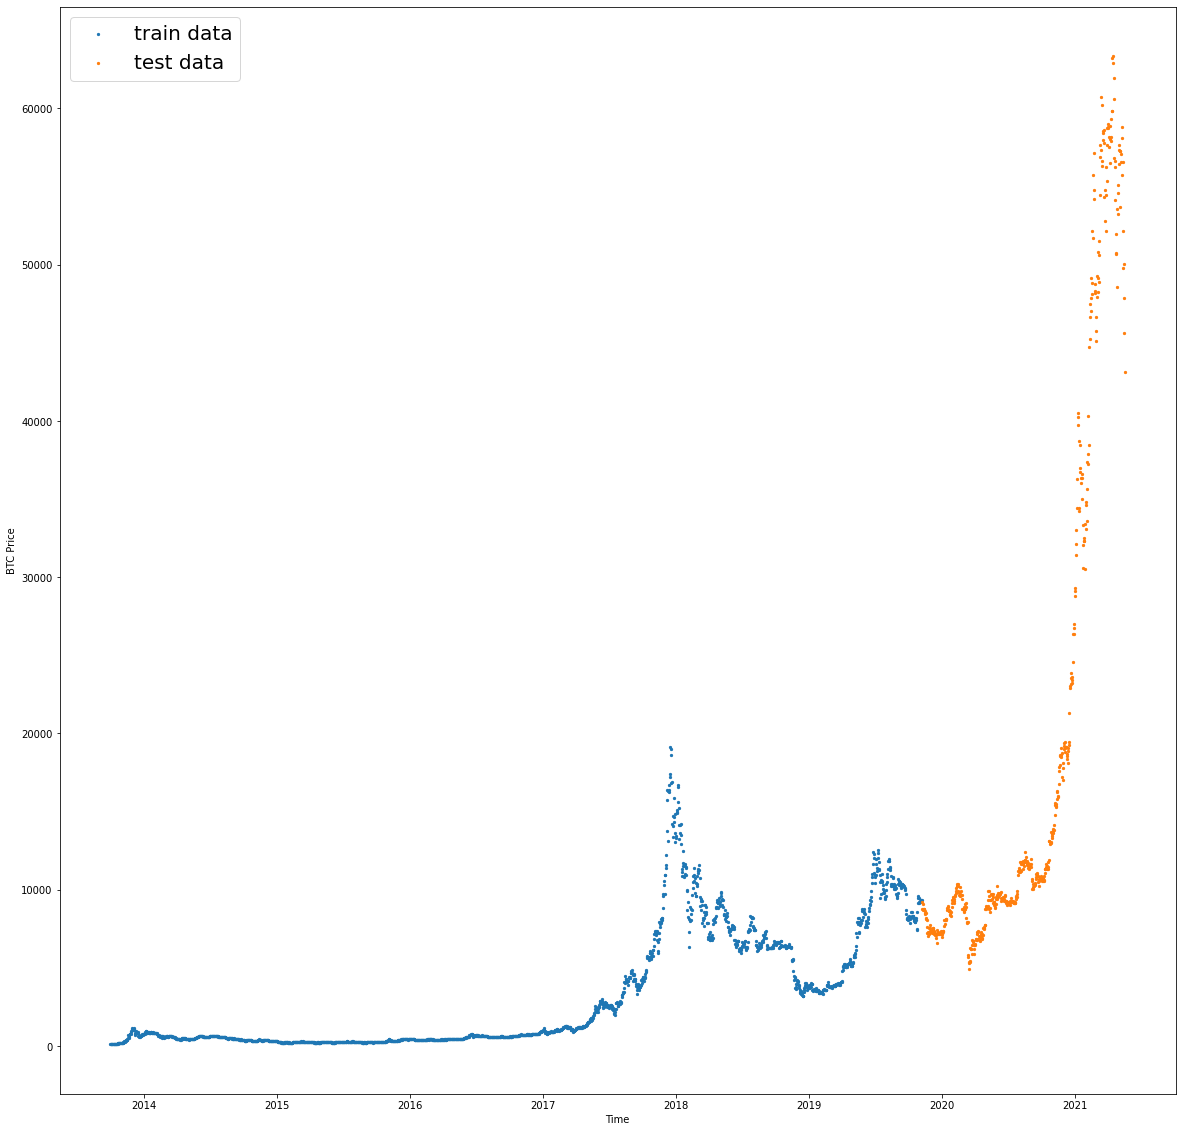

In [46]:
# let's plot wrong train and test split
plt.figure(figsize=(20,20))
plt.scatter(X_train, y_train, s=5, label="train data")
plt.scatter(X_test, y_test, s=5, label="test data")
plt.ylabel("BTC Price")
plt.xlabel("Time")
plt.legend(fontsize=20)
plt.show;

## Create train and test splits (the right way)

In [17]:
# create train and test splits the right way

split_size = int(0.8*len(prices)) # 
X_train, y_train = timesteps[:split_size], prices[:split_size]

X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

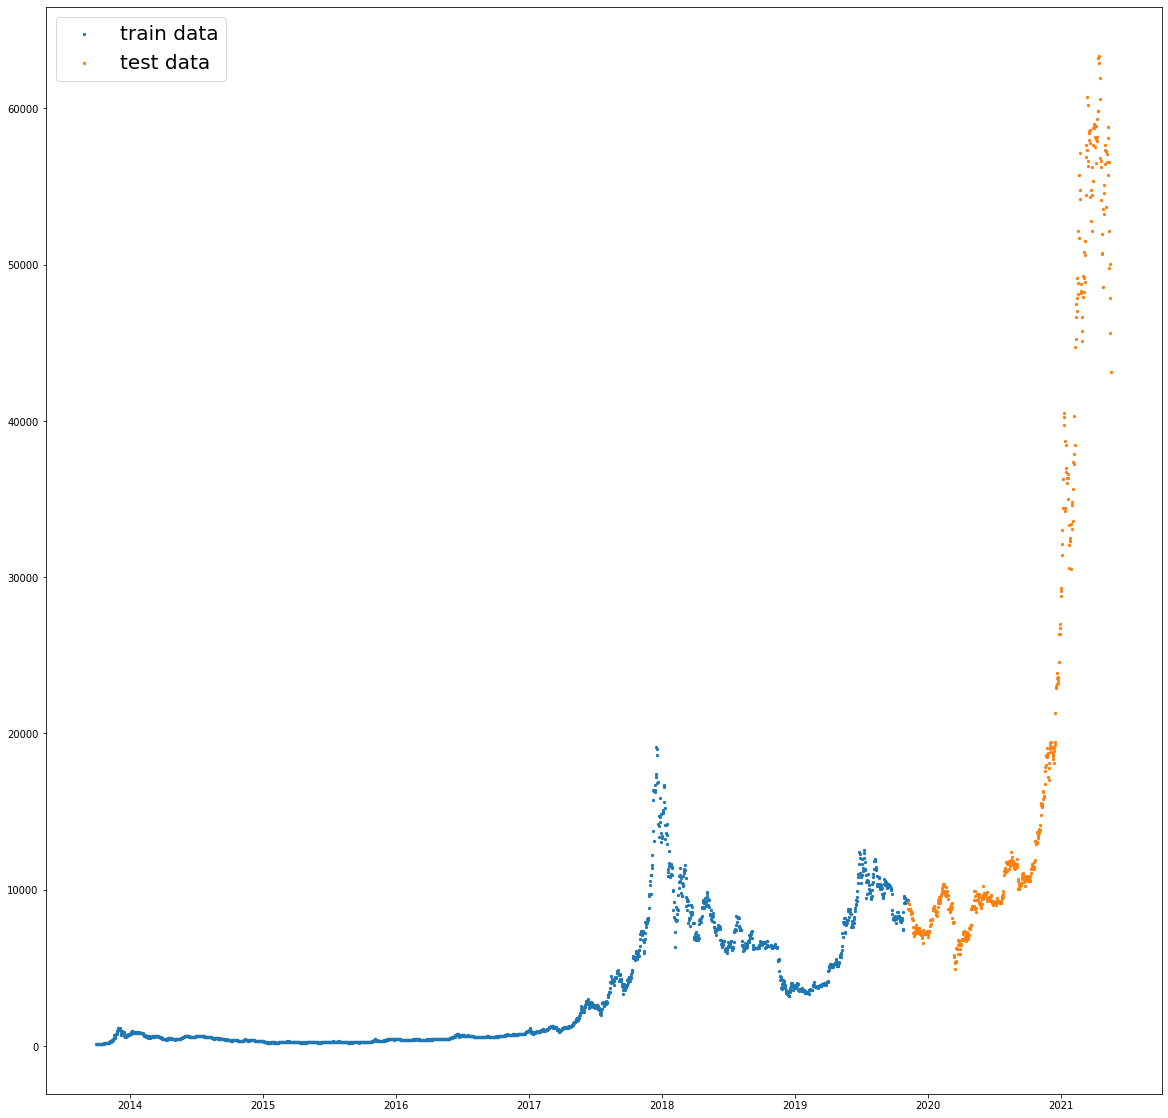

In [19]:
# let's plot right train and test split
plt.figure(figsize=(20,20))
plt.scatter(X_train, y_train, s=5, label="train data")
plt.scatter(X_test, y_test, s=5, label="test data")
plt.ylabel("BTC Price")
plt.xlabel("Time")
plt.legend(fontsize=20)
plt.show;

## Creating a plotting function

In [31]:
# create  a function to plot time series data

def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps (a series of point in time) against values (a saeries of values against time steps)
  Parameters:
  ----------
  timesteps: array of timestep values
  values: array of values across time
  format: style of plot, default "."
  start: where to star tthe plot(setting a value will index from start of timestpes)
  end: where to end the plot (similar to start but for the end)
  label: to show on plot about values 
  """
  # plot the series
  plt.plot(timesteps[start:end], values[start: end], format, label=label)
  plt.xlabel("Date")
  plt.xlabel("Time")
  plt.ylabel("BTC Price")





  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

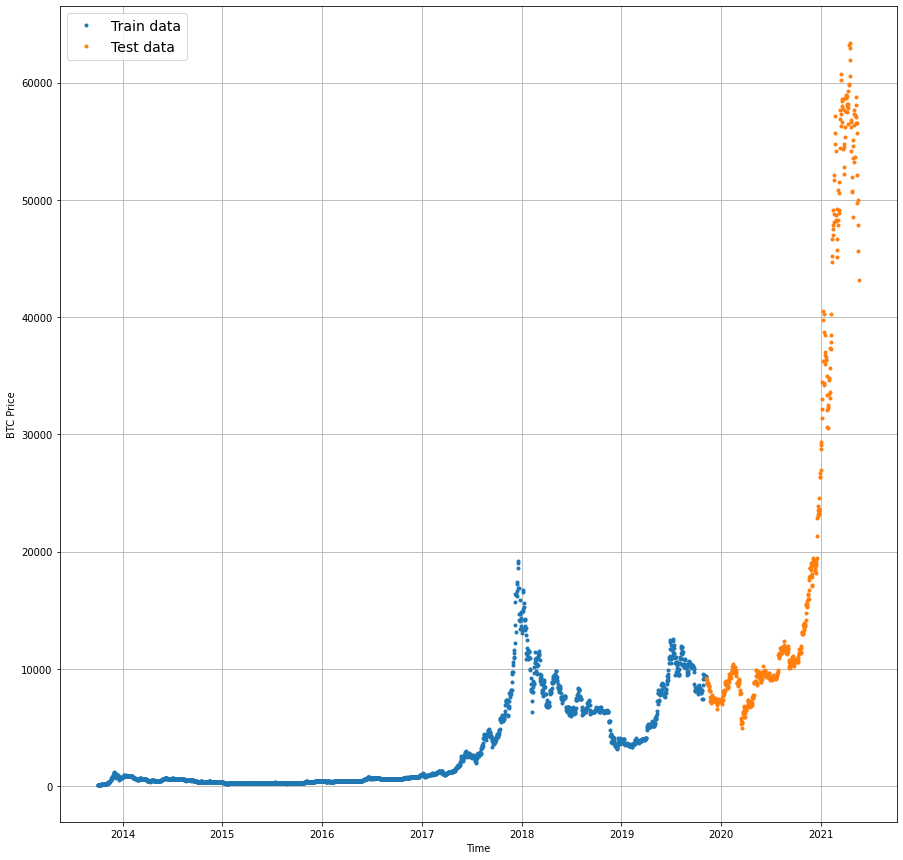

In [49]:

  plt.figure(figsize=(15,15))
  plot_time_series(timesteps=X_train, values=y_train, label="Train data")
  plot_time_series(timesteps=X_test, values=y_test, label="Test data")

# Modelling Experiments

Terms to be familiar with: 

* **Horizon** - number of timesteps into the future we're going to predict
* **Window size** - number of timesteps we're going to use to predict the **horizon**.



Modelling experiments we're running: 

* 0 Naïve model (baseline)
* 1 Dense model, horizon = 1, window = 7
* 2 same as 1, horizon = 1, window = 30
* 3, same as 1, horizon = 7, window = 30
* Conv1D
* LSTM
* Same as 1 but with multivariate data

## Model 0: Naïve forecast(baseline)

The formula looks liek this:

`$$\hat{y}_{t} = y_{t-1}$$`

In English:
> the prediction at time step t(y-hat) is equal to the value at timestep (t-1) previous timestep

In [51]:
# Create a naïve forecast

naive_forecast=y_test[:-1]

In [53]:
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [54]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

In [57]:
listin = [1, 2, 3, 4]

In [58]:
listin[-1]

4

In [59]:
listin[:-1]

[1, 2, 3]

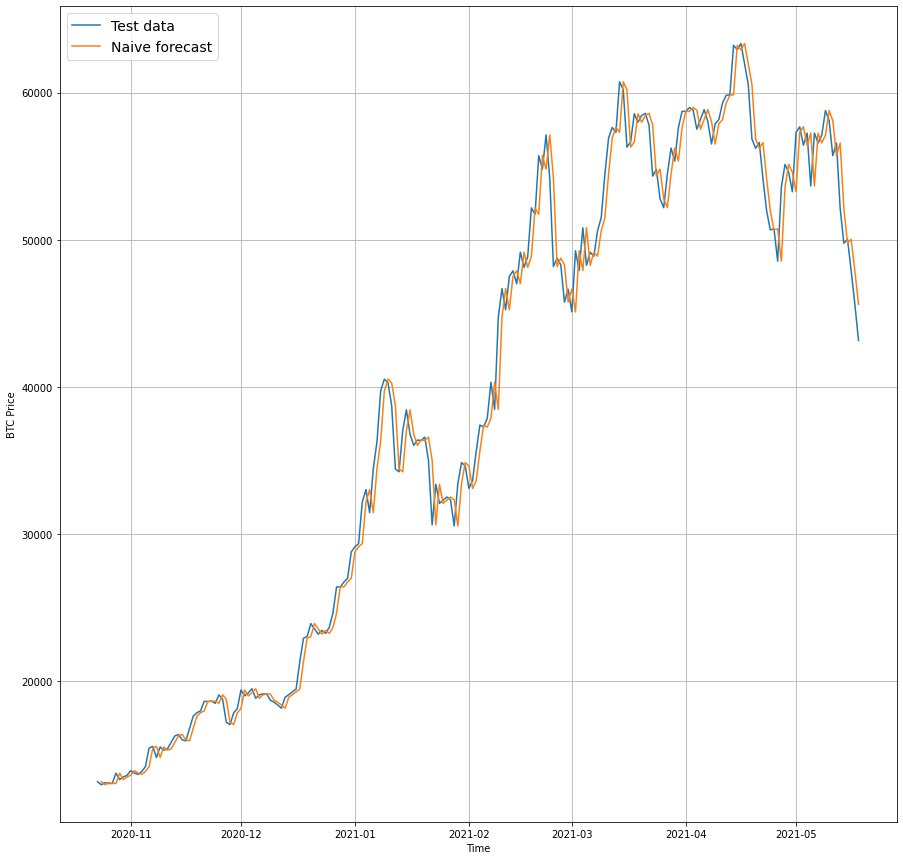

In [68]:
# plot naive forecast
plt.figure(figsize=(15,15))
# plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, start=350, format="-", label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=350, format="-", label="Naive forecast")

## Evaluating a time series model

Let's look at the evaluation metrics for time series forecasting... 

* we're predicting a number, so that means we have a form of **regression problems**.  A few common regression metric are:

1. MAE - mean absolute error,
2. MSE - mean squared error

How does our model's forecasts(y_pred) compare against the groundtruth values (y_true)


* root mean squared error
* (scaled) mean abosliute percentage error (s)MAPE
* mean absolute scaled error
